In [1]:
%matplotlib notebook

In [2]:
import os
import sys
import pandas as pd
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib import gridspec
import mplcursors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.backend_bases import MouseButton
import seaborn as sns
import ipywidgets as widgets

In [3]:
volume = np.load("data/body_volume_mini.npz")['arr_0']
volume = ndimage.zoom(volume, (2, 2, 2, 1), order=0)
dimensions = list(volume.shape[:-1])

In [4]:
dframe_test_sentences = pd.read_json("data/data_frame_small.json")
dframe_test_sentences = dframe_test_sentences[(dframe_test_sentences['title'] != "") & (dframe_test_sentences['abstract'] != "")]

In [5]:
data = dframe_test_sentences.text_mapping.values
data = np.array([np.array(item) for item in data])
data = np.concatenate((data[:, 2][:, None], data[:, 0][:, None], data[:, 1][:, None]), axis=1)
data = np.clip(data, np.array([0.0, 0.0, 0.0]), np.array(dimensions) - 1.0)

<IPython.core.display.Javascript object>


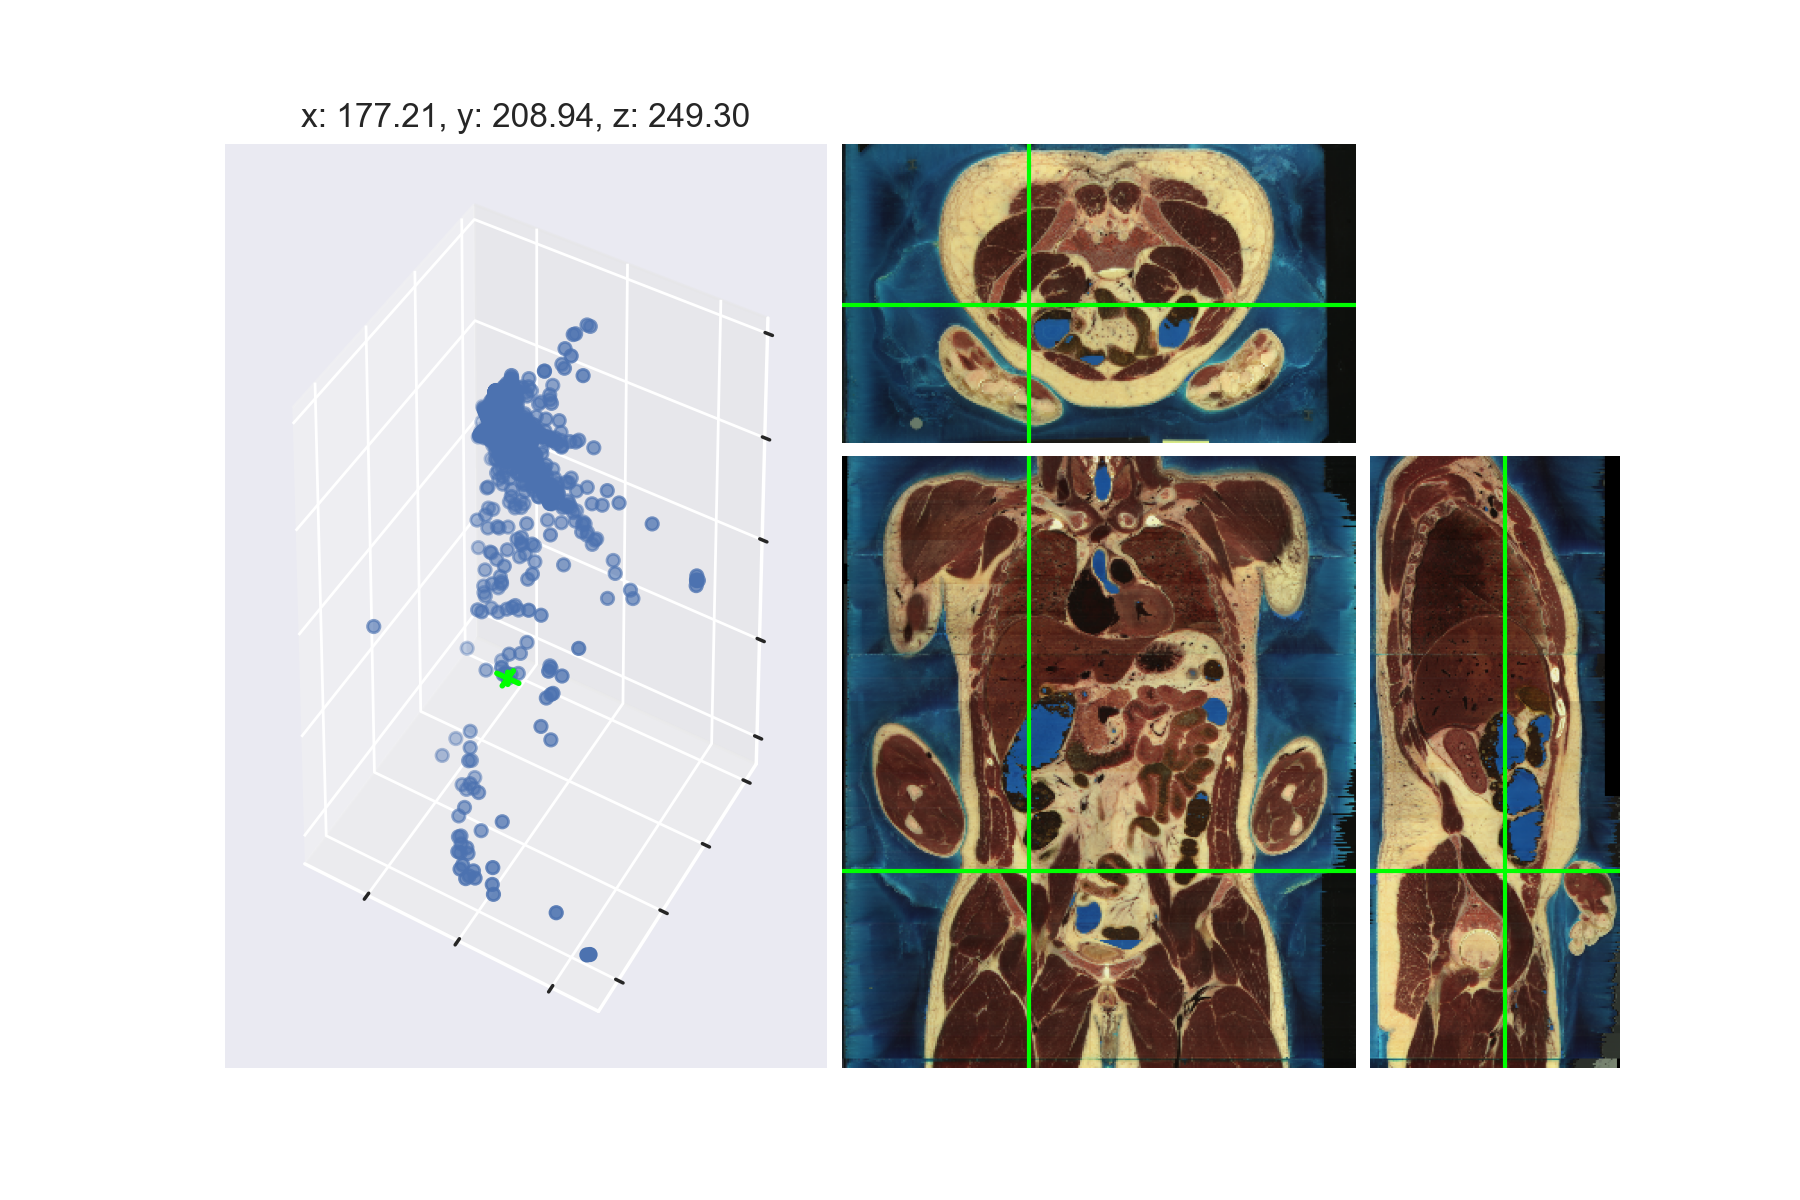

GridBox(children=(HTML(value='', description='Title:'), HTML(value='', description='Author:'), HTML(value='', …

In [6]:
global point

point = [0.0, 0.0, 0.0]

title_box = widgets.HTML(
    value="",
    description="Title:"
)

author_box = widgets.HTML(
    value="",
    description="Author:"
)

abstract_box = widgets.HTML(
    value="",
    description="Abstract:",
)


def create_crosshair(point):
    
    line1, = ax1.plot(point[0] * np.ones(25),
                      point[1] * np.ones(25), 
                      np.arange(point[2]-12, point[2]+13),
                      c='lime',
                      linewidth=2,
                      picker=False)
    line2, = ax1.plot(point[0] * np.ones(25),
                      np.arange(point[1]-12, point[1]+13),
                      point[2] * np.ones(25),
                      c='lime',
                      linewidth=2,
                      picker=False)
    line3, = ax1.plot(np.arange(point[0]-12, point[0]+13),
                      point[1] * np.ones(25),
                      point[2] * np.ones(25), 
                      c='lime',
                      linewidth=2,
                      picker=False)
    return line1, line2, line3



def update_crosshair(point):
    
    line1.set_data(point[0] * np.ones(25), point[1] * np.ones(25))
    line1.set_3d_properties(np.arange(point[2]-12, point[2]+13))
    
    line2.set_data(point[0] * np.ones(25), np.arange(point[1]-12, point[1]+13))
    line2.set_3d_properties(point[2] * np.ones(25))
    
    line3.set_data(np.arange(point[0]-12, point[0]+13), point[1] * np.ones(25))
    line3.set_3d_properties(point[2] * np.ones(25))


def onclick(event):
    '''
    Event handler for button_press_event
    @param event MouseEvent
    '''
    if event.button != MouseButton.LEFT:
        return
    
    if event.inaxes == ax2:   
        
        point[0] = volume.shape[0] - event.ydata
        point[2] = event.xdata
        
        horiz2.set_ydata(event.ydata)
        vert2.set_xdata(event.xdata)
        
        horiz3.set_ydata(event.ydata)
        ax3.index = int(event.xdata)
        ax3.images[0].set_array(volume[:, :, ax3.index])
        
        vert4.set_xdata(event.xdata)
        ax4.index = int(event.ydata)
        ax4.images[0].set_array(volume[ax4.index, :, :])
        
        ax1.set_title(f"x: {point[1]:.2f}, y: {point[2]:.2f}, z: {point[0]:.2f}")
        
    elif event.inaxes == ax3:
        
        point[0] = volume.shape[0] - event.ydata
        point[1] = event.xdata
        
        horiz3.set_ydata(event.ydata)
        vert3.set_xdata(event.xdata)
        
        horiz2.set_ydata(event.ydata)
        ax2.index = int(event.xdata)
        ax2.images[0].set_array(volume[:, ax2.index, :])
        
        horiz4.set_ydata(event.xdata)
        ax4.index = int(event.ydata)
        ax4.images[0].set_array(volume[ax4.index, :, :])
        
        ax1.set_title(f"x: {point[1]:.2f}, y: {point[2]:.2f}, z: {point[0]:.2f}")
        
    elif event.inaxes == ax4:
        
        point[1] = event.ydata
        point[2] = event.xdata
        
        horiz4.set_ydata(event.ydata)
        vert4.set_xdata(event.xdata)
        
        vert2.set_xdata(event.xdata)
        ax2.index = int(event.ydata)
        ax2.images[0].set_array(volume[:, ax2.index, :])
        
        vert3.set_xdata(event.ydata)
        ax3.index = int(event.xdata)
        ax3.images[0].set_array(volume[:, :, ax3.index])
        
        ax1.set_title(f"x: {point[1]:.2f}, y: {point[2]:.2f}, z: {point[0]:.2f}")
        
    else:
        return
    
    update_crosshair([point[1], point[2], point[0]])
    

def onpick(event):
    ind = event.ind[0]
    point = data[ind]
    ax1.set_title(f"x: {point[1]:.2f}, y: {point[2]:.2f}, z: {point[0]:.2f}")

    ax2.index = int(point[1])
    ax2.images[0].set_array(volume[:, ax2.index, :])
    horiz2.set_ydata(volume.shape[0] - point[0])
    vert2.set_xdata(point[2])

    ax3.index = int(point[2])
    ax3.images[0].set_array(volume[:, :, ax3.index])
    horiz3.set_ydata(volume.shape[0] - point[0])
    vert3.set_xdata(point[1])

    ax4.index = int(volume.shape[0] - point[0])
    ax4.index = max(0, min(ax4.index, volume.shape[0] - 1))
    ax4.images[0].set_array(volume[ax4.index, :, :])
    horiz4.set_ydata(point[1])
    vert4.set_xdata(point[2])
    
    update_crosshair([point[1], point[2], point[0]])
    
    title_box.value = dframe_test_sentences.iloc[ind]['title']
    author_box.value = dframe_test_sentences.iloc[ind]['author']
    abstract_box.value = dframe_test_sentences.iloc[ind]['abstract']

sns.set()
fig = plt.figure(figsize = (9, 6))

grid = plt.GridSpec(12, 16, hspace=0.2, wspace=0.2)

ax1 = fig.add_subplot(grid[:, :7], projection='3d')

sc = ax1.scatter(data[:, 1], data[:, 2], data[:, 0], picker=True)
line1, line2, line3 = create_crosshair([volume.shape[1] // 2, volume.shape[2] // 2, volume.shape[0] // 2])


ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])

# x, z, y
ax2 = fig.add_subplot(grid[4:, 7:13])
ax2.index = volume.shape[1] // 2
ax2.imshow(volume[:, ax2.index, :], aspect="auto")
horiz2 = ax2.axhline(volume.shape[0] // 2, color='lime')
vert2 = ax2.axvline(volume.shape[2] // 2, color='lime')
ax2.axis('off')

# y, z, x
ax3 = fig.add_subplot(grid[4:, 13:])
ax3.index = volume.shape[2] // 2
ax3.imshow(volume[:, :, ax3.index], aspect="auto")
horiz3 = ax3.axhline(volume.shape[0] // 2, color='lime')
vert3 = ax3.axvline(volume.shape[1] // 2, color='lime')
ax3.axis('off')

ax4 = fig.add_subplot(grid[:4, 7:13])
ax4.index = volume.shape[0] // 2
ax4.imshow(volume[ax4.index, :, :], aspect="auto")
horiz4 = ax4.axhline(volume.shape[1] // 2, color='lime')
vert4 = ax4.axvline(volume.shape[2] // 2, color='lime')
ax4.axis('off')

fig.canvas.mpl_connect('pick_event', onpick)
fig.canvas.mpl_connect('button_press_event', onclick)

cursor = mplcursors.cursor(ax1, highlight=False)   
@cursor.connect("add")
def _(sel):
    sel.annotation.set(text="", bbox=None)
    sel.annotation.arrow_patch.set(alpha=0.0)

    
widget_box = widgets.GridBox(children=[title_box, author_box, abstract_box],
        layout=widgets.Layout(
            width='100%',
            grid_template_rows='10% 10% 60%',
            grid_template_columns='100%',
            grid_template_areas='''
            "title_box"
            "author_box"
            "abstract_box"
            ''')
       )

widget_box